In [1]:
import pandas as pd
import csv
import requests
import numpy as np
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Import data and drop columns that are not used.

data = pd.read_csv('2017_2020_data.csv')
data = data.drop(data.columns[0], axis=1)

In [3]:
# Remove final attributes.
data = data.drop(['lag24', 'tot_solar_mwh', 'tot_wind_mwh'], axis=1)

<AxesSubplot: ylabel='LMP'>

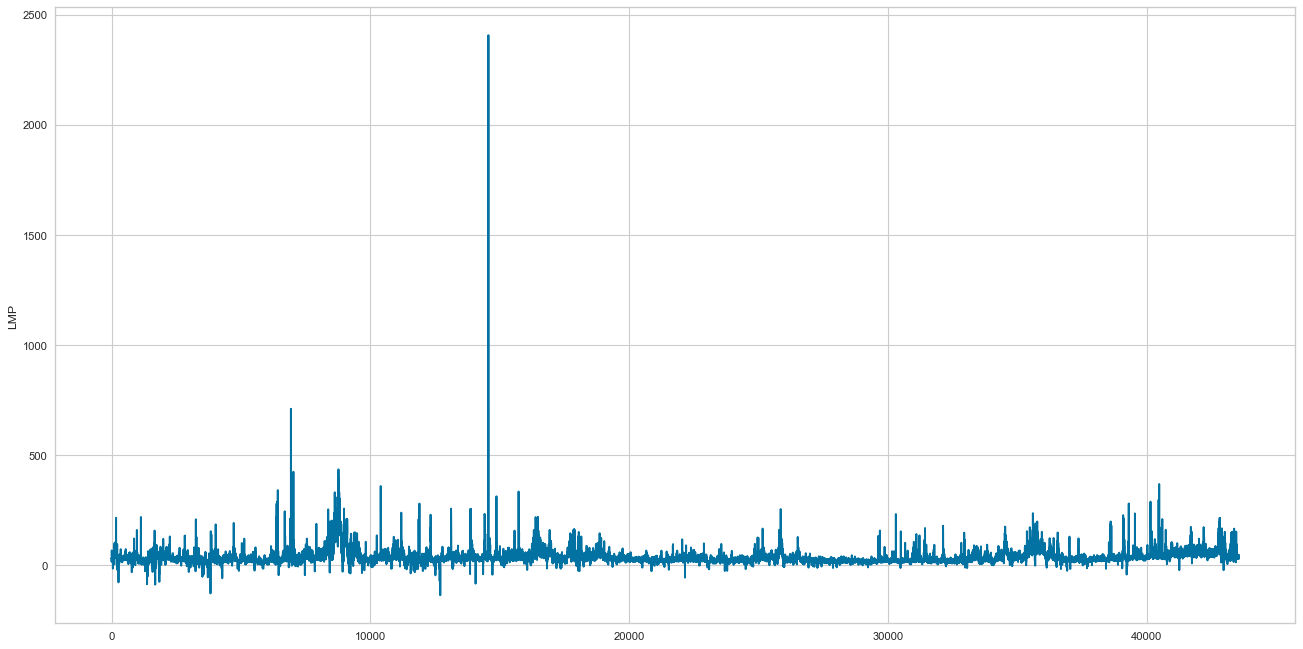

In [4]:
# Plot prices for 2017-2021.

figure(figsize=(20, 10), dpi=80)

sns.lineplot(x=data.index, y="LMP", data=data, ci=None)

In [5]:
# Detection of outliers
 
data[data['LMP']>800]

,Date,LMP,Total_Load,lag48,last_day_LMP,month,day
14558,2018-09-03 16:00:00,1100.42,22435.22,36.62,25.4425,9,3
14559,2018-09-03 17:00:00,2406.26,22982.70,34.84,25.4425,9,3


In [6]:
# Drop outliers.

data = data.drop([14558, 14559]).reset_index(drop=True)

In [7]:
# Seperate data for training and testing. 

train = data.sample(frac=0.9, random_state=408).reset_index(drop=True)
test = data.drop(train.index).reset_index(drop=True)

In [8]:
# Setup
# Notice, we are missing a few values in 2020.

setup = setup(data = train, target = 'LMP', fold_shuffle=True)

,Description,Value
0,session_id,8676
1,Target,LMP
2,Original Data,"(39198, 7)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27438, 49)"


In [9]:
# Compare different models, and select top six. 
# Sort by percentage error.

compare = compare_models(sort="MAPE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.5156,226.9478,14.9655,0.7325,0.3191,0.6280,6.5030
rf,Random Forest Regressor,7.9145,230.0954,15.0774,0.7288,0.3241,0.6609,5.9490
dt,Decision Tree Regressor,10.3157,418.0993,20.3737,0.4976,0.4307,0.7007,0.1650
xgboost,Extreme Gradient Boosting,8.6675,238.0124,15.3371,0.7191,0.3466,0.7079,3.1370
catboost,CatBoost Regressor,8.7953,246.9243,15.6280,0.7082,0.3460,0.7248,1.5720
lightgbm,Light Gradient Boosting Machine,9.2079,266.2012,16.2216,0.6861,0.3614,0.7938,0.1370
huber,Huber Regressor,12.0844,526.6568,22.8663,0.3763,0.4451,0.8948,0.8140
gbr,Gradient Boosting Regressor,10.8415,374.0311,19.2654,0.5572,0.4054,0.9058,1.9410
en,Elastic Net,12.5408,479.7893,21.8366,0.4307,0.4510,0.9310,0.0330
br,Bayesian Ridge,12.0611,428.7697,20.6339,0.4919,0.4853,0.9322,0.0990


In [10]:
model_et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.5400,199.8917,14.1383,0.7440,0.3201,0.3286
1,7.3864,192.8524,13.8871,0.7623,0.3132,0.6915
2,7.2560,195.6533,13.9876,0.7361,0.3292,0.5182
3,7.4477,281.6002,16.7809,0.7230,0.3074,0.2733
4,7.7669,291.0570,17.0604,0.6981,0.2927,0.2468
5,7.6487,224.6576,14.9886,0.7097,0.3328,0.8846
6,7.2237,182.8003,13.5204,0.7514,0.3159,0.3011
7,7.9503,341.4696,18.4789,0.6678,0.3339,2.2351
8,7.4964,182.8206,13.5211,0.7417,0.3237,0.5008


In [11]:
model_rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.7821,189.5417,13.7674,0.7573,0.3233,0.3569
1,7.9634,209.9659,14.4902,0.7412,0.3280,0.8249
2,7.6600,200.0264,14.1431,0.7302,0.3313,0.5380
3,7.8386,292.0854,17.0905,0.7127,0.3063,0.2909
4,7.9178,285.2018,16.8879,0.7042,0.2946,0.2546
5,7.9670,207.1395,14.3923,0.7323,0.3355,0.8496
6,7.5693,185.5664,13.6223,0.7477,0.3214,0.3215
7,8.4745,344.2765,18.5547,0.6651,0.3409,2.3595
8,8.0515,195.5908,13.9854,0.7236,0.3307,0.5016


In [12]:
model_xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6615,198.4922,14.0887,0.7458,0.3596,0.4004
1,8.5732,222.0304,14.9007,0.7263,0.3355,0.7840
2,8.5180,221.9305,14.8973,0.7007,0.3584,0.5687
3,8.6584,289.5068,17.0149,0.7152,0.3294,0.3245
4,8.8191,273.5876,16.5405,0.7162,0.3179,0.2900
5,8.6304,191.6311,13.8431,0.7524,0.3661,0.9247
6,8.2697,198.6855,14.0956,0.7298,0.3446,0.3571
7,9.1885,373.0186,19.3137,0.6371,0.3644,2.5587
8,8.5916,200.7447,14.1684,0.7163,0.3479,0.5239


In [13]:
model_catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6481,203.2978,14.2583,0.7397,0.3511,0.4087
1,8.7367,217.2550,14.7396,0.7322,0.3405,0.7757
2,8.5879,227.4461,15.0813,0.6932,0.3513,0.5555
3,8.8179,307.4776,17.5350,0.6975,0.3307,0.3269
4,8.8913,285.9650,16.9105,0.7034,0.3215,0.2972
5,8.7481,206.2473,14.3613,0.7335,0.3603,0.9173
6,8.6138,227.7151,15.0902,0.6903,0.3431,0.3622
7,9.2130,375.3805,19.3747,0.6348,0.3625,2.7204
8,8.7969,206.5966,14.3735,0.7081,0.3490,0.5330


In [14]:
model_lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0989,226.5860,15.0528,0.7098,0.3683,0.4341
1,9.1613,245.3266,15.6629,0.6976,0.3598,0.8601
2,9.0369,243.8894,15.6170,0.6711,0.3681,0.6169
3,9.2478,336.9964,18.3575,0.6685,0.3475,0.3586
4,9.3374,318.2394,17.8393,0.6699,0.3376,0.3146
5,9.0456,220.4713,14.8483,0.7151,0.3721,0.9010
6,8.7656,202.0943,14.2160,0.7252,0.3527,0.3830
7,9.7612,397.7766,19.9443,0.6130,0.3804,3.1224
8,9.2993,229.3948,15.1458,0.6758,0.3628,0.5724


In [15]:
model_dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.0337,337.0973,18.3602,0.5683,0.4269,0.4225
1,10.1320,342.5485,18.5081,0.5777,0.4235,0.8603
2,10.1593,394.5638,19.8636,0.4678,0.4300,0.6462
3,9.8864,440.6915,20.9927,0.5665,0.4099,0.3464
4,10.8481,488.0867,22.0927,0.4937,0.4256,0.3512
5,10.8319,542.6697,23.2953,0.2988,0.4527,0.8451
6,10.1979,477.8590,21.8600,0.3502,0.4388,0.3845
7,10.4869,466.9676,21.6094,0.5457,0.4343,2.1943
8,10.2649,331.8826,18.2176,0.5310,0.4292,0.5731


In [16]:
# Finalize models.

final_et = finalize_model(model_et)
final_rf = finalize_model(model_rf)
final_xgboost = finalize_model(model_xgboost)
final_catboost = finalize_model(model_catboost)
final_lightgbm = finalize_model(model_lightgbm)
final_dt = finalize_model(model_dt)

/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/tr

In [17]:
# Save models.

save_model(final_et, 'et_model', model_only=True);
save_model(final_rf, 'rf_model', model_only=True);
save_model(final_xgboost, 'xgboost_model', model_only=True);
save_model(final_catboost, 'catboost_model', model_only=True);
save_model(final_lightgbm, 'lightgbm_model', model_only=True);
save_model(final_dt, 'dt_model', model_only=True);

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


In [18]:
# Load models (i.e. testing).

final_et = load_model('et_model');
final_rf = load_model('rf_model');
final_xgboost = load_model('xgboost_model');
final_catboost = load_model('catboost_model');
final_lightgbm = load_model('lightgbm_model');
final_dt = load_model('dt_model');

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [19]:
# Create predictions.

prediction_struct = test.drop(['Total_Load', 'lag48', 'last_day_LMP', 'month', 'day'], axis=1)

et_predictions = predict_model(final_et, data=test)[['Label']]
rf_predictions = predict_model(final_rf, data=test)[['Label']]
xgboost_predictions = predict_model(final_xgboost, data=test)[['Label']]
catboost_predictions = predict_model(final_catboost, data=test)[['Label']]
lightgbm_predictions = predict_model(final_lightgbm, data=test)[['Label']]
dt_predictions = predict_model(final_dt, data=test)[['Label']]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6729,17.6346,4.1994,0.9750,0.0573,0.0116


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,3.3290,42.7383,6.5375,0.9393,0.1029,0.0619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,8.0229,150.9632,12.2867,0.7857,0.2167,0.1584


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,9.2924,205.4926,14.3350,0.7083,0.2463,0.1800


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,10.2842,260.1166,16.1281,0.6307,0.2692,0.1980


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.9870,48.2679,6.9475,0.9315,0.0995,0.0184


In [20]:
et_predictions.rename(columns = {'Label':'et_prediction'}, inplace = True)
rf_predictions.rename(columns = {'Label':'rf_prediction'}, inplace = True)
xgboost_predictions.rename(columns = {'Label':'xgboost_prediction'}, inplace = True)
catboost_predictions.rename(columns = {'Label':'catboost_prediction'}, inplace = True)
lightgbm_predictions.rename(columns = {'Label':'lightgbm_prediction'}, inplace = True)
dt_predictions.rename(columns = {'Label':'dt_prediction'}, inplace = True)

In [21]:
# Join predictions.
prediction = pd.concat([prediction_struct, et_predictions, rf_predictions, xgboost_predictions, catboost_predictions, lightgbm_predictions, dt_predictions], axis=1)
prediction

,Date,LMP,et_prediction,rf_prediction,xgboost_prediction,catboost_prediction,lightgbm_prediction,dt_prediction
0,2021-07-03 13:00:00,23.69,23.690001,23.3548,17.939884,19.492697,22.738340,23.690001
1,2021-07-03 14:00:00,22.22,22.219999,22.5790,19.201937,21.969327,22.667917,22.219999
2,2021-07-03 15:00:00,21.47,21.469999,21.9418,19.436258,22.706550,23.059400,21.469999
3,2021-07-03 16:00:00,21.47,22.161700,22.7288,25.622854,26.405368,24.903695,23.209999
4,2021-07-03 17:00:00,21.24,21.240000,21.9108,24.713579,26.462144,24.982059,21.240000
...,...,...,...,...,...,...,...,...
4350,2021-12-31 19:00:00,33.73,33.730000,35.0981,33.096752,31.938523,33.939117,33.730000
4351,2021-12-31 20:00:00,31.14,31.139999,32.4283,32.612610,31.316700,32.059042,31.139999
4352,2021-12-31 21:00:00,31.18,31.180000,30.7987,29.164650,28.384296,27.599492,31.180000
4353,2021-12-31 22:00:00,31.11,31.110001,30.5707,26.402733,28.012544,24.676575,31.110001


<AxesSubplot: ylabel='LMP'>

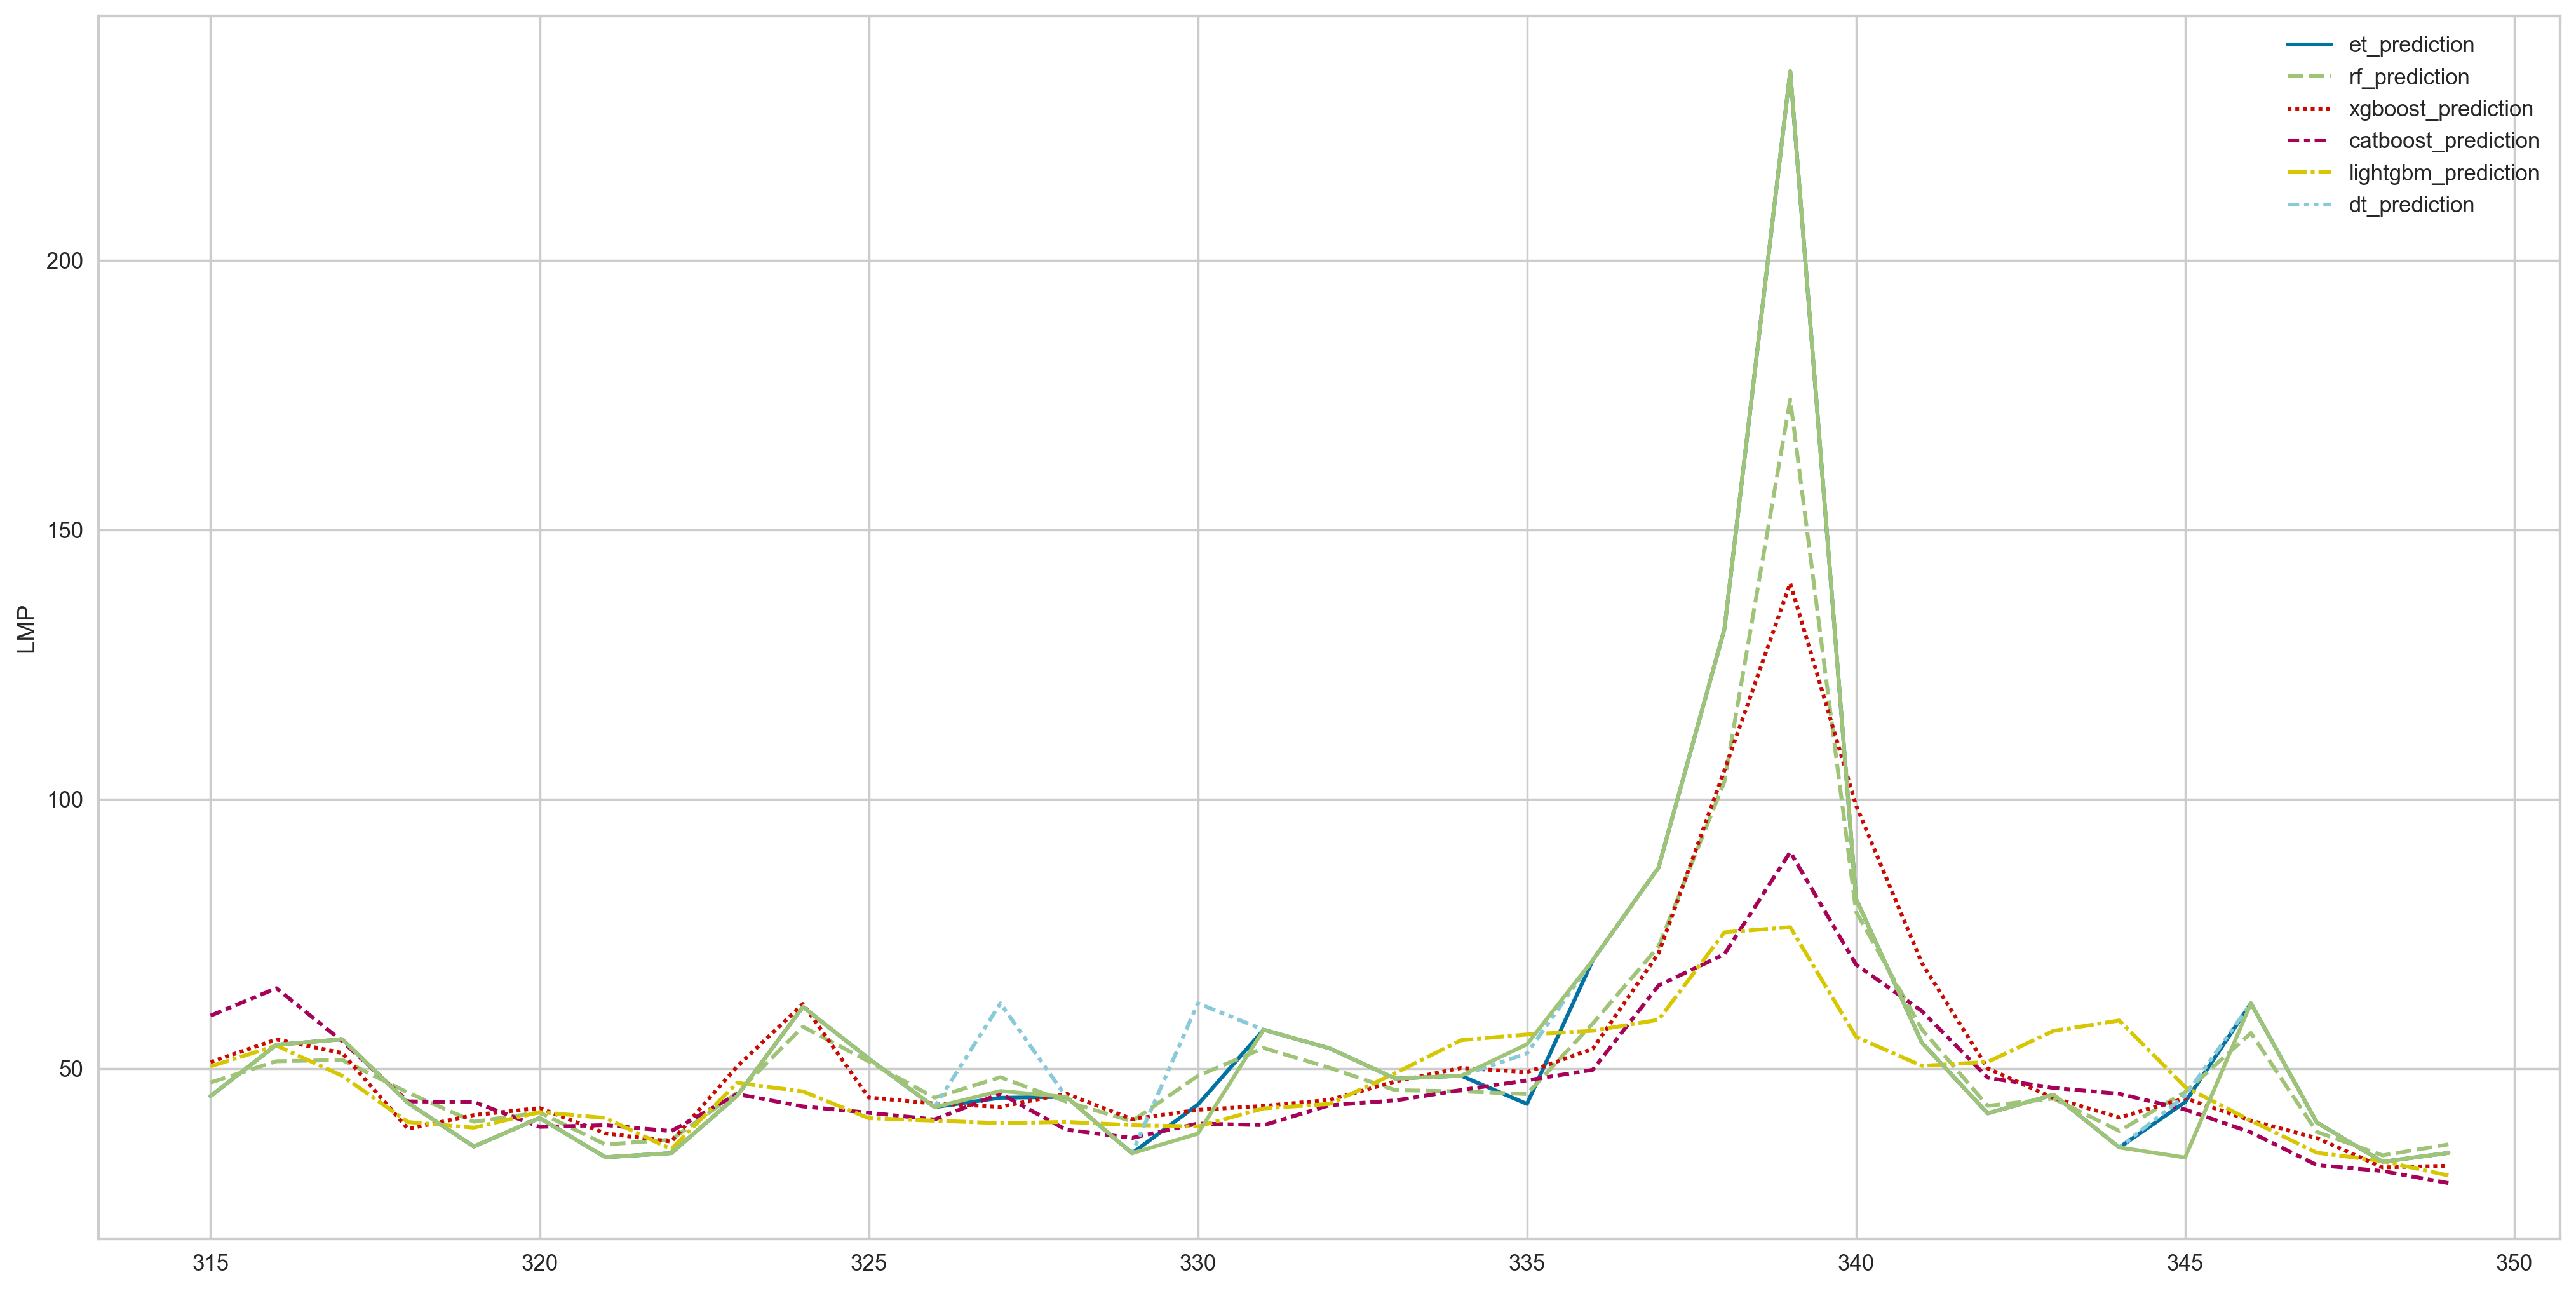

In [22]:
figure(figsize=(20, 10), dpi=250)

# prediction
sns.lineplot(data=prediction.iloc[315:350].drop(['LMP'], axis=1))
sns.lineplot(x=prediction.iloc[315:350].index, y='LMP', data=prediction.iloc[315:350], ci=None)

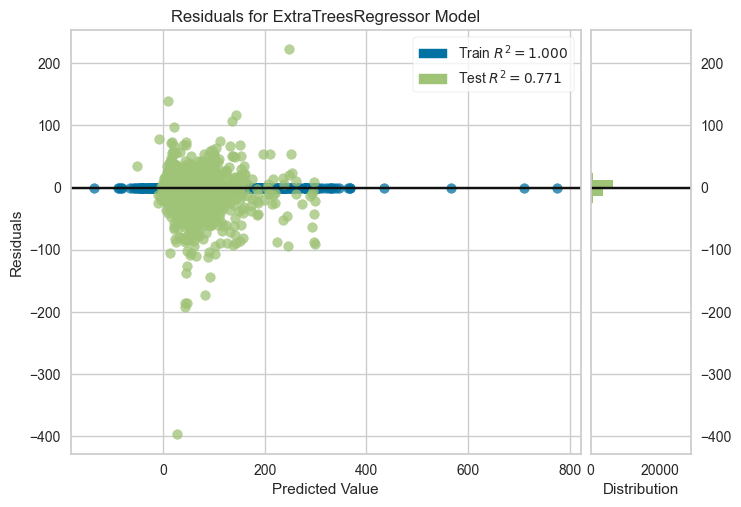

In [23]:
# Checking ET model. 

plot_model(model_et)

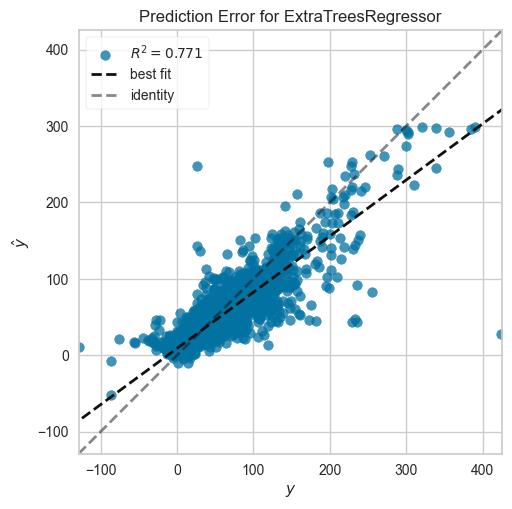

In [24]:
plot_model(model_et, plot = 'error')

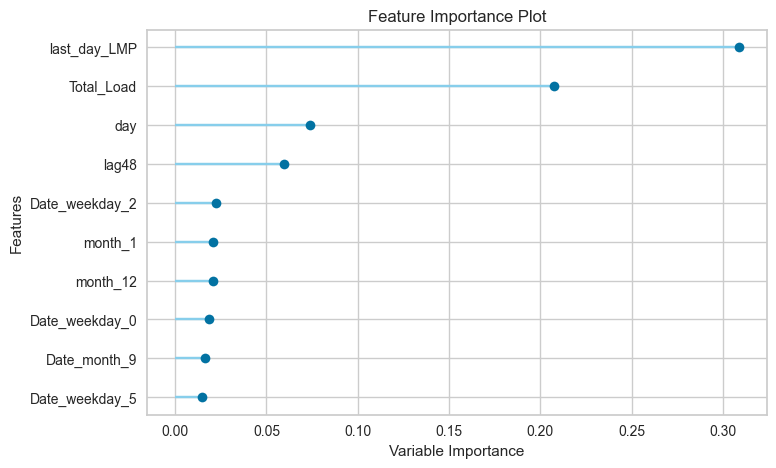

In [25]:
plot_model(model_et, plot = 'feature')

In [26]:
prediction.to_csv('prediction.csv')

In [27]:
save_config('model_config')

/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/Users/martin/myprojects/microsoft_risk/microsoft-risk/risk_venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 a